# Feinstaubsensor

Kleine Auswertung eines Feinstaubsensors

## imports & variables

In [ ]:
import requests
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
from IPython.display import clear_output

## read & visualize current sensor values

In [2]:
url = 'http://api.luftdaten.info/v1/sensor/2460/'
df = pd.DataFrame(columns=['timestamp', 'pm10', 'pm25'])

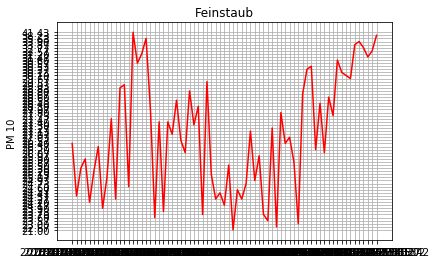

In [ ]:
i = 0
while True:
  clear_output()
  
  resp = requests.get(url=url)
  data = json.loads(resp.text)[0]

  timestamp = data['timestamp']
  pm10 = data['sensordatavalues'][0]['value']
  pm25 = data['sensordatavalues'][1]['value']

  
  df.loc[i] = [timestamp, pm10, pm25]
  df = df.drop_duplicates()
  
  plt.plot_date(x=df['timestamp'], y=df['pm10'], fmt="r-")
  plt.title("Feinstaub")
  plt.ylabel("PM 10 ")
  plt.grid(True)
  plt.show()
  
  i+=1
  time.sleep(30)